In [1]:
import torch
import numpy as np
import random
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data.dataset import random_split

import torch.nn as nn
import time
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML
from tabulate import tabulate
from IPython.display import clear_output



import sys
sys.path.append("/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Experimental_setup")
from Experiment_v5 import Experiment
sys.path.append("/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Training")
from Training_Networks import Training
sys.path.append("/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Analysis")
from Check import Checkup



sys.path.append("/Users/charlottebeylier/Documents/PhD/Atari1.0/Reinforcement-Learning_modif/cgames/02_space_invader/Analysis")
from Manifold_Analysis import Manifold_analysis



from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.metrics import pairwise_distances

from matplotlib.ticker import NullFormatter
from collections import OrderedDict
from functools import partial
from sklearn import manifold, datasets

In [2]:
# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

def set_seed(seed=None, seed_torch=True):
    if seed is None:
        seed = np.random.choice(2 ** 32)
    random.seed(seed)
    np.random.seed(seed)
    if seed_torch:
        torch.manual_seed(seed)

    print(f'Random seed {seed} has been set.')

SEED = 2021
set_seed(seed=SEED)
# if gpu is to be used
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print("Device: ", device)

G_SEED = torch.Generator()
G_SEED.manual_seed(SEED)

Device:  cpu
Random seed 2021 has been set.


# Multi

## Generate the Dataset

In [3]:
WIDTH = 100

BATCH_SIZE = 32

set_seed(seed=SEED)

experiment = Experiment(width = WIDTH,batch_size=BATCH_SIZE,size_output_multi = 2)


dataset_train,dataset_space_train,dataset_weather_train,dataset_val,dataset_space_val,dataset_weather_val,dataset_test,dataset_space_test,dataset_weather_test= experiment.Generate_data()
train_loader = torch.utils.data.DataLoader(dataset_train,batch_size=BATCH_SIZE,shuffle = False )
val_loader = torch.utils.data.DataLoader(dataset_val,batch_size=BATCH_SIZE,shuffle = False )
test_loader_multi = torch.utils.data.DataLoader(dataset_test,batch_size=1,shuffle = False ) #bATCH SIZE =1 HERE FOR THE DATASET ONLY, ELSE TAKE WHATEVER BATCH SIZE IN INDIVIDUAL MODE

Random seed 2021 has been set.
Test size dataset space torch.Size([999, 6])
Test size dataset weather torch.Size([999, 6])
Train size dataset space torch.Size([7000, 6])
Train size dataset weather torch.Size([7000, 6])


# Train the Models

## Multi

In [4]:
Input_Dimension = 6
Nodes_Second = 5
Nodes_Third =5
Output_Dimension = 2

do_analysis = True

In [5]:
ITERATION = 1

Epoch 0, val_loss 0.2245871074615963


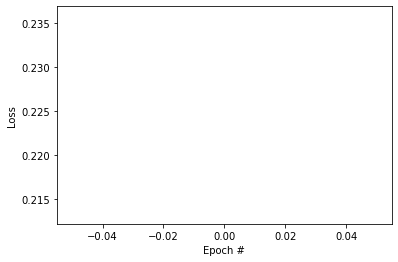

aaaaa
ccccc
eeee
ggggg
nodes input 6


ValueError: expected 2D or 3D input (got 1D input)

In [6]:
EPOCH = 100
Multi_losses = []
for i in range(ITERATION):
    training = Training()
    model,val_losses = training.training_multi(Input_Dimension,Nodes_Second,Nodes_Third,Output_Dimension,EPOCH,train_loader,val_loader,test_loader_multi,do_analysis)
    Multi_losses.append(val_losses)

In [ ]:
for x_test, y_test in test_loader_multi:
    with torch.no_grad():
        model.eval()
        yhat = torch.nn.Sigmoid()(model(x_test).squeeze(1))
        print("x_test",x_test)
        print("y_test",y_test)
        print("prediction",yhat)
        print("---------")

x_test tensor([[0.6100, 0.2600, 0.8300, 0.1300, 0.5300, 0.0000]])
y_test tensor([[0., 0.]])
prediction tensor([[1.0078e-14, 4.4965e-02]])
---------
x_test tensor([[0.7200, 0.8100, 0.4000, 0.4000, 0.4600, 0.0000]])
y_test tensor([[1., 0.]])
prediction tensor([[0.9988, 0.0450]])
---------
x_test tensor([[0.2000, 0.9200, 0.2600, 0.7500, 0.0900, 0.0000]])
y_test tensor([[0., 0.]])
prediction tensor([[4.1239e-09, 4.4965e-02]])
---------
x_test tensor([[0.2400, 0.8300, 0.6300, 0.8700, 0.5100, 0.0000]])
y_test tensor([[0., 0.]])
prediction tensor([[4.1239e-09, 4.4965e-02]])
---------
x_test tensor([[0.9400, 0.0100, 0.5000, 0.3600, 0.5500, 0.0000]])
y_test tensor([[0., 0.]])
prediction tensor([[0.0000, 0.0450]])
---------
x_test tensor([[0.6500, 0.7200, 0.8800, 0.5700, 0.9500, 0.0000]])
y_test tensor([[1., 0.]])
prediction tensor([[0.9998, 0.0450]])
---------
x_test tensor([[0.1300, 0.4600, 0.4300, 0.4300, 0.0600, 0.0000]])
y_test tensor([[0., 0.]])
prediction tensor([[1.7126e-05, 4.4965e-02]]

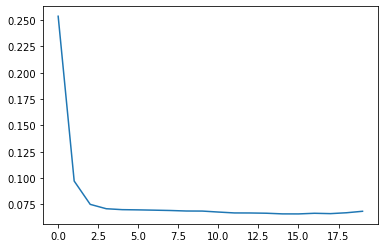

In [ ]:
epochs = [i for i in range(len(Multi_losses[0]))]
plt.figure()
for i in range(ITERATION):
    plt.plot(Multi_losses[i])

## WEATHER

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset_weather_train,batch_size=BATCH_SIZE,shuffle = False )
val_loader = torch.utils.data.DataLoader(dataset_weather_val,batch_size=BATCH_SIZE,shuffle = False )
test_loader_weather = torch.utils.data.DataLoader(dataset_weather_test,batch_size=1,shuffle = False ) #bATCH SIZE =1 HERE FOR THE DATASET ONLY, ELSE TAKE WHATEVER BATCH SIZE IN INDIVIDUAL MODE

In [ ]:
Nodes_Second = 20
Nodes_Third = 5
Output_Dimension = 2

In [ ]:
EPOCH = 200
Weather_losses = []
for i in range(ITERATION):
    training = Training()
    model,val_losses = training.training_individual(5,Nodes_Second,Nodes_Third,EPOCH,train_loader ,val_loader)
    Weather_losses.append(val_losses)

TypeError: training_individual() missing 3 required positional arguments: 'test_loader', 'do_analysis', and 'type'

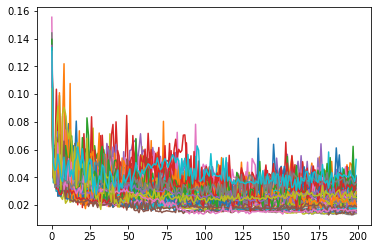

In [ ]:
epochs = [i for i in range(len(Weather_losses[0]))]
plt.figure()
for i in range(ITERATION):
    plt.plot(Weather_losses[i])

In [ ]:
## SPATIAL

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset_space_train,batch_size=BATCH_SIZE,shuffle = False )
val_loader = torch.utils.data.DataLoader(dataset_space_val,batch_size=BATCH_SIZE,shuffle = False )
test_loader_space = torch.utils.data.DataLoader(dataset_space_test,batch_size=1,shuffle = False ) #bATCH SIZE =1 HERE FOR THE DATASET ONLY, ELSE TAKE WHATEVER BATCH SIZE IN INDIVIDUAL MODE

Epoch 190, val_loss 0.0240559596864004


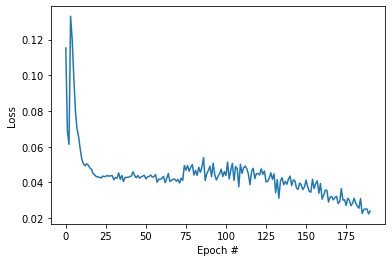

In [ ]:
EPOCH = 200
Spatial_losses = []
for i in range(ITERATION):
    training = Training()
    model,val_losses = training.training_individual(5,Nodes_Second,Nodes_Third,EPOCH,train_loader ,val_loader)
    Spatial_losses.append(val_losses)

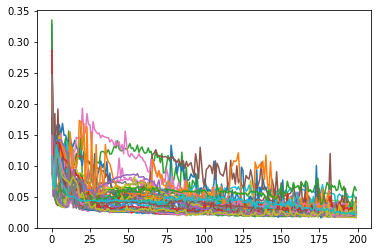

In [ ]:
epochs = [i for i in range(len(Spatial_losses[0]))]
plt.figure()
for i in range(ITERATION):
    plt.plot(Spatial_losses[i])

# Average comparison

In [ ]:
a = torch.mean(torch.tensor(Multi_losses),0)
b = torch.mean(torch.tensor(Weather_losses),0)
c = torch.mean(torch.tensor(Spatial_losses),0)

In [ ]:
print(a.shape)

torch.Size([200])


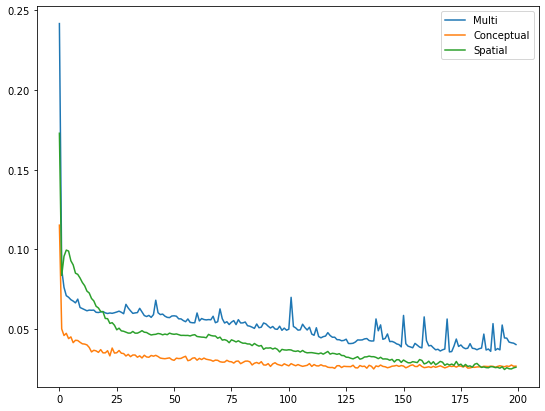

In [ ]:
plt.figure(figsize = (9,7))
plt.plot(epochs,a,label= "Multi")
plt.plot(epochs,b,label= "Conceptual")
plt.plot(epochs,c,label= "Spatial")

plt.legend()